              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

[[1541   52]
 [ 220  187]]


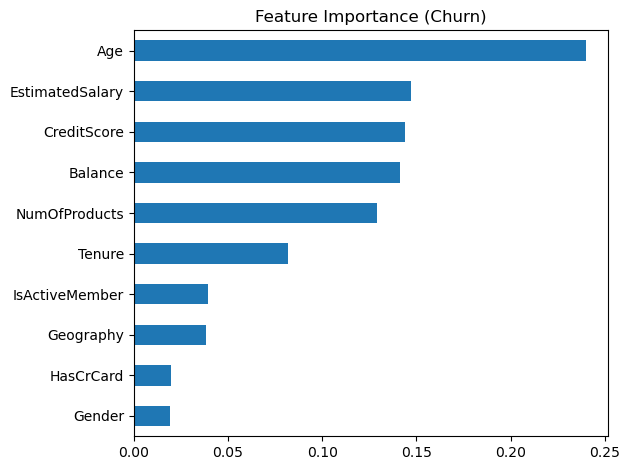

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (make sure the CSV is in the same folder)
df = pd.read_csv('Churn_Modelling.csv')

# Drop columns that are not useful for modeling
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
le_geo = LabelEncoder()
le_gender = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Feature/target split
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance (Churn)')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
